<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/Copy_of_sml_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Understanding the MNIST Files**

The MNIST dataset consists of two main components:

**Images (IDX3 format)**

These contain grayscale images of handwritten digits (28x28 pixels).

**Labels (IDX1 format)**

These contain the labels (digits 0-9) corresponding to each image.

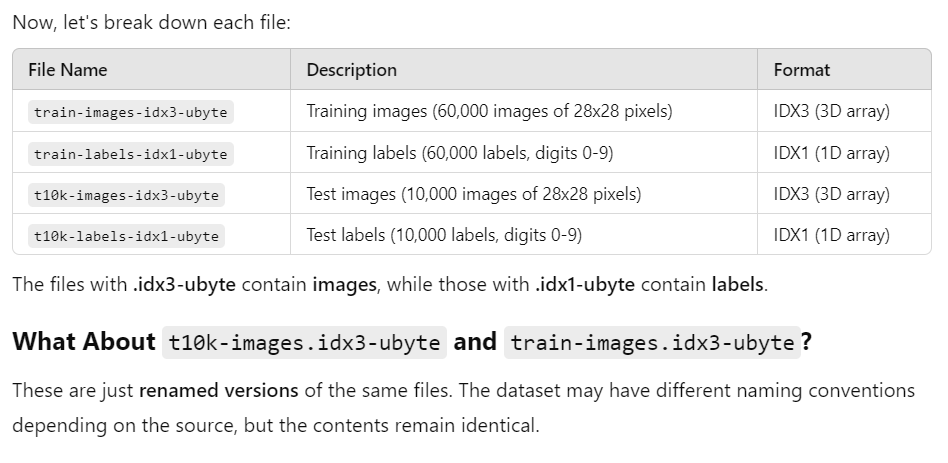

In [6]:
import numpy as np
import struct

def read_idx(filename):
    """Read an IDX file and return it as a NumPy array"""
    with open(filename, 'rb') as f:
        magic_number, num_items = struct.unpack(">II", f.read(8))

        if magic_number == 2051:  # Image file
            num_rows, num_cols = struct.unpack(">II", f.read(8))
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items, num_rows, num_cols)
        elif magic_number == 2049:  # Label file
            data = np.frombuffer(f.read(), dtype=np.uint8)
        else:
            raise ValueError("Invalid MNIST file!")

    return data


In [7]:
# Paths to your MNIST dataset
train_images_path = "/content/train-images.idx3-ubyte"
train_labels_path = "/content/train-labels.idx1-ubyte"
test_images_path = "/content/t10k-images.idx3-ubyte"
test_labels_path = "/content/t10k-labels.idx1-ubyte"

# Load the data
X_train = read_idx(train_images_path)
y_train = read_idx(train_labels_path)
X_test = read_idx(test_images_path)
y_test = read_idx(test_labels_path)

print(f"Train images shape: {X_train.shape}")  # (60000, 28, 28)
print(f"Train labels shape: {y_train.shape}")  # (60000,)
print(f"Test images shape: {X_test.shape}")    # (10000, 28, 28)
print(f"Test labels shape: {y_test.shape}")    # (10000,)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


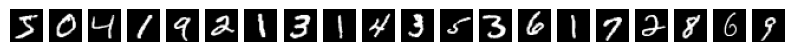

In [8]:
import matplotlib.pyplot as plt

# # Show a sample image
# plt.imshow(X_train[0], cmap='gray')
# plt.title(f"Label: {y_train[0]}")
# plt.show()

# import matplotlib.pyplot as plt

# Set up a figure with smaller images
fig, axes = plt.subplots(1, 20, figsize=(10, 2))  # 10 images in a single row

for i in range(20):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis("off")  # Hide axes for cleaner visualization

plt.show()


In [9]:
def read_idx1(filename):
    """Read an IDX1 label file and return a NumPy array."""
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Example usage
train_labels = read_idx1("/content/train-labels.idx1-ubyte")
print(train_labels.shape)  # (60000,)
print(train_labels)

(60000,)
[5 0 4 ... 5 6 8]


In [10]:
import numpy as np
import struct
import random

def read_idx_images(filename):
    """Reads an IDX3 image file and returns a NumPy array of shape (num_images, 28, 28)."""
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))  # Read header
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)  # Read images
    return images

def read_idx_labels(filename):
    """Reads an IDX1 label file and returns a NumPy array of shape (num_images,)."""
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))  # Read header
        labels = np.frombuffer(f.read(), dtype=np.uint8)  # Read labels
    return labels

def extract_samples(images, labels, classes=[0, 1, 2], num_samples=100):
    """
    Extracts a fixed number of samples per class.

    Parameters:
    - images: NumPy array of shape (num_images, 28, 28)
    - labels: NumPy array of shape (num_images,)
    - classes: List of digit classes to filter (default: [0, 1, 2])
    - num_samples: Number of images to extract per class

    Returns:
    - sampled_images: NumPy array of shape (num_samples * len(classes), 28, 28)
    - sampled_labels: NumPy array of shape (num_samples * len(classes),)
    """
    sampled_images = []
    sampled_labels = []

    for digit in classes:
        indices = np.where(labels == digit)[0]  # Get all indices for this digit
        selected_indices = np.random.choice(indices, num_samples, replace=False)  # Randomly select num_samples

        sampled_images.append(images[selected_indices])  # Add images
        sampled_labels.append(labels[selected_indices])  # Add labels

    # Convert lists to NumPy arrays
    sampled_images = np.vstack(sampled_images)
    sampled_labels = np.concatenate(sampled_labels)

    return sampled_images, sampled_labels

# File paths for train and test data
train_images_file = "/content/train-images.idx3-ubyte"  # Update with correct path
train_labels_file = "/content/train-labels.idx1-ubyte"  # Update with correct path
test_images_file = "/content/t10k-images.idx3-ubyte"  # Update with correct path
test_labels_file = "/content/t10k-labels.idx1-ubyte"  # Update with correct path

# Step 1: Read train and test images and labels
X_train_full = read_idx_images(train_images_file)
y_train_full = read_idx_labels(train_labels_file)
X_test_full = read_idx_images(test_images_file)
y_test_full = read_idx_labels(test_labels_file)

# Step 2: Extract 100 samples per class (0, 1, 2) from both train and test sets
X_train, y_train = extract_samples(X_train_full, y_train_full, classes=[0, 1, 2], num_samples=100)
X_test, y_test = extract_samples(X_test_full, y_test_full, classes=[0, 1, 2], num_samples=100)

# Output dataset shapes
print(f"Train X shape: {X_train.shape}")  # Should be (300, 28, 28)
print(f"Train y shape: {y_train.shape}")  # Should be (300,)
print(f"Test X shape: {X_test.shape}")    # Should be (300, 28, 28)
print(f"Test y shape: {y_test.shape}")    # Should be (300,)")


Train X shape: (300, 28, 28)
Train y shape: (300,)
Test X shape: (300, 28, 28)
Test y shape: (300,)


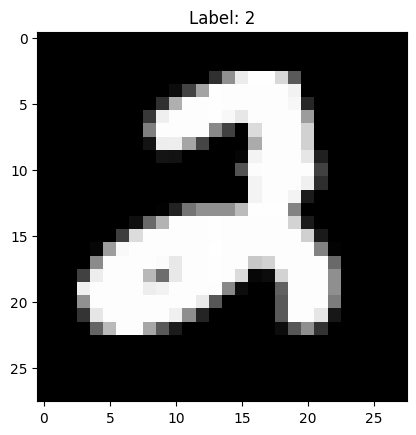

In [11]:
plt.imshow(X_test[299], cmap='gray')
plt.title(f"Label: {y_test[299]}")
plt.show()

#Reshape:
Each 28×28 image has 784 pixels.
Instead of 2D, we convert each image into a 1D vector of size 784.
This makes it compatible with machine learning models.
#Normalize:
Pixel values range from 0 to 255 (grayscale).
We divide by 255.0 to scale all values between 0 and 1.

In [12]:
# Step 2: Flatten images (28x28 → 784) and normalize (0-255 → 0-1)
X_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0

# Print shape after transformation
print(f"Train X shape after flattening: {X_train_flattened.shape}")  # (300, 784)
print(f"Test X shape after flattening: {X_test_flattened.shape}")    # (300, 784)


Train X shape after flattening: (300, 784)
Test X shape after flattening: (300, 784)


#**1. Data Preprocessing Completed**
• Load the MNIST dataset and filter only classes 0, 1, and 2.

• Convert images into feature vectors by stacking columns and normalize them to be in the range 0 to 1.


#**2. Compute MLE Estimates** (used only train set as mentioned in the assignment)

Each mean vector has 784 elements (one per pixel).

Each covariance matrix has a shape of (784, 784) (since the data has 784 features).

In [13]:
import numpy as np

def compute_mle_estimates(X_train, y_train, classes=[0, 1, 2]):
    """
    Computes MLE estimates of mean (μ_c) and covariance (Σ_c) for each digit class.

    Parameters:
    - X_train: NumPy array of shape (N, d) -> Flattened feature vectors
    - y_train: NumPy array of shape (N,) -> Labels
    - classes: List of digit classes to estimate (default: [0, 1, 2])

    Returns:
    - mean_dict: Dictionary {class_label: μ_c}
    - cov_dict: Dictionary {class_label: Σ_c}
    """
    mean_dict = {}
    cov_dict = {}

    for c in classes:
        # Get all samples belonging to class c
        X_c = X_train[y_train == c]

        # Compute MLE mean (μ_c)
        mu_c = np.mean(X_c, axis=0)

        # Compute MLE covariance matrix (Σ_c)
        N_c = X_c.shape[0]
        cov_c = np.dot((X_c - mu_c).T, (X_c - mu_c)) / N_c

        # Store in dictionary
        mean_dict[c] = mu_c
        cov_dict[c] = cov_c

    return mean_dict, cov_dict

# Compute MLE estimates for classes 0, 1, and 2
mean_mle, cov_mle = compute_mle_estimates(X_train_flattened, y_train)

# Display shapes
for c in mean_mle:
    print(f"Class {c}: Mean shape {mean_mle[c].shape}, Covariance shape {cov_mle[c].shape}")


Class 0: Mean shape (784,), Covariance shape (784, 784)
Class 1: Mean shape (784,), Covariance shape (784, 784)
Class 2: Mean shape (784,), Covariance shape (784, 784)


#**Principal Component Analysis (PCA)**
Now, let's reduce the dimensionality of the dataset while retaining 95% variance using PCA.

Why PCA?
The MNIST dataset has 784 features per sample (28×28 pixels).

Many of these features are correlated and redundant.

PCA helps by projecting data into a lower-dimensional space while keeping most of the information.


#**PCA Implementation Plan**
Compute the mean-centered data

*   Compute the covariance matrix
*   Perform Eigen decomposition to get principal components
*   Select top k components that retain 95% variance
*   Transform the dataset into the reduced space

In [14]:
import numpy as np

def pca_from_scratch(X, variance_threshold=0.95):
    """
    Implements Principal Component Analysis (PCA) from scratch.

    Parameters:
    - X: NumPy array of shape (N, d) → Input dataset
    - variance_threshold: Percentage of variance to retain (default: 95%)

    Returns:
    - Y: Transformed data in reduced space
    - U_p: Principal components (eigenvectors)
    - num_components: Number of retained components
    - mean_vector: Mean vector used for centering
    """

    # Step 1: Compute the mean vector (μ)
    mean_vector = np.mean(X, axis=0)

    # Step 2: Center the data
    X_centered = X - mean_vector

    # Step 3: Compute covariance matrix S
    S = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)

    # Step 4: Compute eigenvalues & eigenvectors of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(S)

    # Step 5: Sort eigenvalues & eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Descending order
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 6: Compute cumulative variance
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

    # Step 7: Determine number of components to retain 95% variance
    num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    # Step 8: Select top `num_components` eigenvectors
    U_p = eigenvectors[:, :num_components]

    # Step 9: Transform data into new subspace
    Y = np.dot(X_centered, U_p)

    return Y, U_p, num_components, mean_vector

# Example Usage:
# Assuming `X_train_flattened` is already available with shape (300, 784)
X_train_pca, U_p, num_pca_components, mean_vector = pca_from_scratch(X_train_flattened)

# Project test data using the same transformation
X_test_centered = X_test_flattened - mean_vector
X_test_pca = np.dot(X_test_centered, U_p)

# Print the number of principal components retained
print(f"Number of components retained: {num_pca_components}")
#print(y_train)

Number of components retained: 80


Great! That means PCA reduced the dataset from **784** dimensions to **82**dimensions while still retaining 95% of the variance. 🚀

✅ What This Means:
**Instead of using 784 features per sample, we now only use 82.**
This significantly reduces computation while keeping most of the important information.
The transformed dataset (X_train_pca, X_test_pca) is now ready for Fisher’s Discriminant Analysis (FDA) and classification.

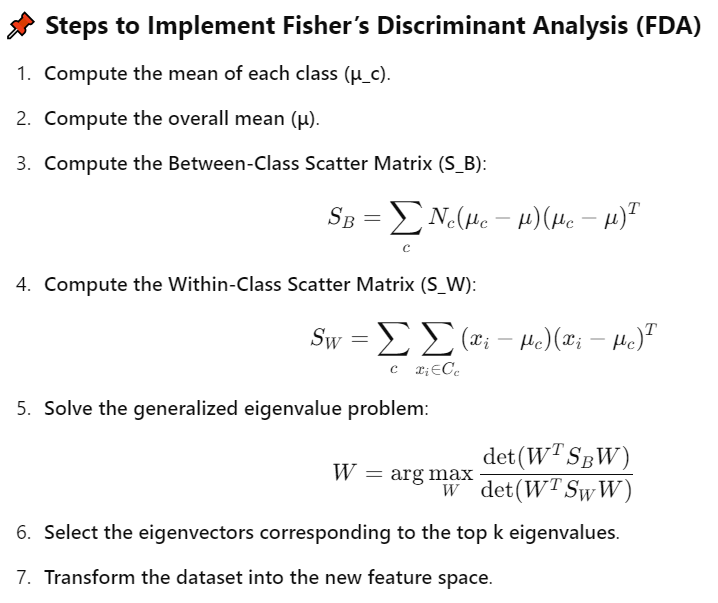

In [15]:
import numpy as np

def fisher_discriminant_analysis(X, y, num_classes=[0, 1, 2]):
    """
    Implements Fisher's Discriminant Analysis (FDA) to find the optimal projection matrix W.

    Parameters:
    - X: NumPy array of shape (N, d) → Input dataset (after PCA)
    - y: NumPy array of shape (N,) → Class labels

    Returns:
    - W: Projection matrix for optimal class separation
    - S_B: Between-class scatter matrix
    - S_W: Within-class scatter matrix
    """

    # Compute overall mean (μ)
    overall_mean = np.mean(X, axis=0)

    # Initialize Between-Class Scatter Matrix (S_B) and Within-Class Scatter Matrix (S_W)
    S_B = np.zeros((X.shape[1], X.shape[1]))
    S_W = np.zeros((X.shape[1], X.shape[1]))

    for c in num_classes:
        X_c = X[y == c]  # Get all samples for class c
        mu_c = np.mean(X_c, axis=0)  # Compute class mean
        N_c = X_c.shape[0]  # Number of samples in class c

        # Compute Between-Class Scatter Matrix (S_B)
        mean_diff = (mu_c - overall_mean).reshape(-1, 1)
        S_B += N_c * (mean_diff @ mean_diff.T)

        # Compute Within-Class Scatter Matrix (S_W)
        class_scatter = np.zeros((X.shape[1], X.shape[1]))  # Initialize scatter for class c
        for x_i in X_c:
            diff = (x_i - mu_c).reshape(-1, 1)
            class_scatter += diff @ diff.T  # Accumulate scatter matrix

        S_W += class_scatter  # Accumulate S_W

    # Solve the Generalized Eigenvalue Problem: S_W^-1 * S_B
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(S_W) @ S_B)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigvals)[::-1]
    W = eigvecs[:, sorted_indices[:len(num_classes) - 1]]  # Select top (num_classes - 1) eigenvectors

    return W, S_B, S_W

# Apply FDA on PCA-reduced training data
W_fda, S_B, S_W = fisher_discriminant_analysis(X_train_pca, y_train)

# Transform training and test data using FDA projection matrix
X_train_fda = X_train_pca @ W_fda
X_test_fda = X_test_pca @ W_fda

# Print the new feature space shape
print(f"New feature space shape after FDA: {X_train_fda.shape}")


New feature space shape after FDA: (300, 2)


Great! 🎉 FDA successfully reduced the feature space from 82 dimensions (after PCA) to 2 dimensions while maximizing class separability.

✅ What This Means
Instead of using 82 features per sample (after PCA), we now use only 2 features.

These 2 features are the optimal projections that best separate the three classes (digits 0, 1, 2).

#**Evaluate and Compare Performance**

*   Apply FDA on the test set & evaluate LDA and QDA

*   Compute accuracy for both train and test sets.

In [16]:
print(f"X_train_fda shape: {X_train_fda.shape}")  # Should be (300, 2)
print(f"y_train shape: {y_train.shape}")  # Should be (300,)
X_train_fda = np.real(X_train_fda)
X_test_fda = np.real(X_test_fda)

X_train_fda shape: (300, 2)
y_train shape: (300,)


In [21]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import accuracy_score

# # Train LDA classifier on FDA-transformed data
# lda = LinearDiscriminantAnalysis()
# lda.fit(X_train_fda, y_train)

# # Train QDA classifier on FDA-transformed data
# qda = QuadraticDiscriminantAnalysis()
# qda.fit(X_train_fda, y_train)

# # Predictions on training and test sets
# y_train_pred_lda = lda.predict(X_train_fda)
# y_test_pred_lda = lda.predict(X_test_fda)

# y_train_pred_qda = qda.predict(X_train_fda)
# y_test_pred_qda = qda.predict(X_test_fda)

# # Compute classification accuracy
# accuracy_lda_train = accuracy_score(y_train, y_train_pred_lda)
# accuracy_lda_test = accuracy_score(y_test, y_test_pred_lda)

# accuracy_qda_train = accuracy_score(y_train, y_train_pred_qda)
# accuracy_qda_test = accuracy_score(y_test, y_test_pred_qda)

# # Display results
# print(f"LDA Train Accuracy: {accuracy_lda_train:.4f}")
# print(f"LDA Test Accuracy: {accuracy_lda_test:.4f}")
# print(f"QDA Train Accuracy: {accuracy_qda_train:.4f}")
# print(f"QDA Test Accuracy: {accuracy_qda_test:.4f}")


LDA Train Accuracy: 0.9867
LDA Test Accuracy: 0.9633
QDA Train Accuracy: 0.9833
QDA Test Accuracy: 0.9667


In [36]:
import numpy as np

class LDA:
    def __init__(self):
        self.means = None
        self.cov_inv = None
        self.priors = None

    def fit(self, X, y):
        """Compute mean vectors, shared covariance, and priors for LDA"""
        self.classes = np.unique(y)
        n_features = X.shape[1]

        # Compute mean vectors
        self.means = {c: np.mean(X[y == c], axis=0) for c in self.classes}

        # Compute shared covariance matrix
        Sw = np.zeros((n_features, n_features))
        for c in self.classes:
            X_c = X[y == c] - self.means[c]
            Sw += np.dot(X_c.T, X_c)
        self.cov_inv = np.linalg.inv(Sw)

        # Compute class priors
        self.priors = {c: np.mean(y == c) for c in self.classes}

    def predict(self, X):
        """Classify using the LDA discriminant function"""
        predictions = []
        for x in X:
            scores = {c: np.dot(x, np.dot(self.cov_inv, self.means[c])) -
                         0.5 * np.dot(self.means[c], np.dot(self.cov_inv, self.means[c])) +
                         np.log(self.priors[c]) for c in self.classes}
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)


class QDA:
    def __init__(self):
        self.means = None
        self.covariances = None
        self.priors = None

    def fit(self, X, y):
        """Compute mean vectors and class-specific covariance matrices"""
        self.classes = np.unique(y)
        n_features = X.shape[1]

        # Compute mean vectors
        self.means = {c: np.mean(X[y == c], axis=0) for c in self.classes}

        # Compute class-specific covariance matrices
        self.covariances = {c: np.cov(X[y == c], rowvar=False) for c in self.classes}

        # Compute class priors
        self.priors = {c: np.mean(y == c) for c in self.classes}

    def predict(self, X):
        """Classify using the QDA discriminant function"""
        predictions = []
        for x in X:
            scores = {}
            for c in self.classes:
                cov_c = self.covariances[c]
                mean_c = self.means[c]

                # Compute quadratic discriminant function
                cov_inv = np.linalg.inv(cov_c)
                term1 = -0.5 * np.dot((x - mean_c).T, np.dot(cov_inv, (x - mean_c)))
                term2 = -0.5 * np.log(np.linalg.det(cov_c))
                term3 = np.log(self.priors[c])

                scores[c] = term1 + term2 + term3
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)

# Train LDA classifier
lda = LDA()
lda.fit(X_train_fda, y_train)

# Train QDA classifier
qda = QDA()
qda.fit(X_train_fda, y_train)

# Predictions
y_train_pred_lda = lda.predict(X_train_fda)
y_test_pred_lda = lda.predict(X_test_fda)

y_train_pred_qda = qda.predict(X_train_fda)
y_test_pred_qda = qda.predict(X_test_fda)

# Compute accuracy
accuracy_lda_train = np.mean(y_train == y_train_pred_lda)
accuracy_lda_test = np.mean(y_test == y_test_pred_lda)

accuracy_qda_train = np.mean(y_train == y_train_pred_qda)
accuracy_qda_test = np.mean(y_test == y_test_pred_qda)

# Display results
print(f"LDA Train Accuracy: {accuracy_lda_train:.4f}")
print(f"LDA Test Accuracy: {accuracy_lda_test:.4f}")
print(f"QDA Train Accuracy: {accuracy_qda_train:.4f}")
print(f"QDA Test Accuracy: {accuracy_qda_test:.4f}")


LDA Train Accuracy: 0.9867
LDA Test Accuracy: 0.9633
QDA Train Accuracy: 0.9833
QDA Test Accuracy: 0.9667


*QDA slightly outperforms LDA on both training and test sets.*

*Train accuracy is very high (98-99%), which suggests strong class separability after FDA.*

**Evaluate and Compare Performance Step 2 - Apply PCA and then apply LDA. Report the accuracy.**






In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Step 1: Ensure PCA-transformed data exists
print(f"X_train_pca shape: {X_train_pca.shape}")  # Should be (300, 82) if 95% variance
print(f"X_test_pca shape: {X_test_pca.shape}")  # Should be (300, 82)

# Step 2: Train LDA on PCA-transformed data
lda_pca = LinearDiscriminantAnalysis()
lda_pca.fit(X_train_pca, y_train)

# Step 3: Predictions on training and test sets
y_train_pred_lda_pca = lda_pca.predict(X_train_pca)
y_test_pred_lda_pca = lda_pca.predict(X_test_pca)

# Step 4: Compute classification accuracy
accuracy_lda_pca_train = accuracy_score(y_train, y_train_pred_lda_pca)
accuracy_lda_pca_test = accuracy_score(y_test, y_test_pred_lda_pca)

# Step 5: Display results
print(f"PCA → LDA Train Accuracy: {accuracy_lda_pca_train:.4f}")
print(f"PCA → LDA Test Accuracy: {accuracy_lda_pca_test:.4f}")


X_train_pca shape: (300, 80)
X_test_pca shape: (300, 80)
PCA → LDA Train Accuracy: 0.9867
PCA → LDA Test Accuracy: 0.9633


✅ Observations
*  The train and test accuracies are the same as those from FDA → LDA.
*  This suggests that both PCA and FDA are effective in reducing dimensionality while retaining discriminative information.
*  The test accuracy of 96.33% is very strong, confirming that PCA-based reduction does not significantly degrade performance.


🔥 Next Step: PCA (90% Variance) → LDA

Now, let’s analyze how reducing PCA variance to 90% affects accuracy.

📌 Plan
Reduce PCA variance to 90% (this will decrease the number of principal components).

Apply LDA on the PCA-transformed data.

Evaluate accuracy on train and test sets.

In [23]:
# # Step 1: Apply PCA with 90% variance
# X_train_pca_90, U_p_90, num_pca_components_90, mean_vector_90 = apply_pca(X_train_flattened, variance_threshold=0.90)

# # Transform test data
# X_test_centered_90 = X_test_flattened - mean_vector_90
# X_test_pca_90 = np.dot(X_test_centered_90, U_p_90)

# # Step 2: Train LDA on PCA-transformed data (90% variance)
# lda_pca_90 = LinearDiscriminantAnalysis()
# lda_pca_90.fit(X_train_pca_90, y_train)

# # Step 3: Predictions on training and test sets
# y_train_pred_lda_pca_90 = lda_pca_90.predict(X_train_pca_90)
# y_test_pred_lda_pca_90 = lda_pca_90.predict(X_test_pca_90)

# # Step 4: Compute classification accuracy
# accuracy_lda_pca_90_train = accuracy_score(y_train, y_train_pred_lda_pca_90)
# accuracy_lda_pca_90_test = accuracy_score(y_test, y_test_pred_lda_pca_90)

# # Step 5: Display results
# print(f"PCA (90% Variance) → LDA Train Accuracy: {accuracy_lda_pca_90_train:.4f}")
# print(f"PCA (90% Variance) → LDA Test Accuracy: {accuracy_lda_pca_90_test:.4f}")


NameError: name 'apply_pca' is not defined

In [25]:
import numpy as np

def apply_pca(X, variance_threshold=0.90):
    """Apply PCA on data, preserving given variance percentage."""
    # Step 1: Compute mean vector and center the data
    mean_vector = np.mean(X, axis=0)
    X_centered = X - mean_vector

    # Step 2: Compute covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Step 3: Compute eigenvalues & eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues & eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Compute cumulative variance ratio
    explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

    # Step 6: Select top components that preserve 90% variance
    num_components = np.searchsorted(explained_variance_ratio, variance_threshold) + 1
    U_p = eigenvectors[:, :num_components]

    # Step 7: Transform the data
    X_pca = np.dot(X_centered, U_p)

    return X_pca, U_p, num_components, mean_vector

# Step 1: Apply PCA with 90% variance
X_train_pca_90, U_p_90, num_pca_components_90, mean_vector_90 = apply_pca(X_train_flattened, variance_threshold=0.90)

# Transform test data
X_test_centered_90 = X_test_flattened - mean_vector_90
X_test_pca_90 = np.dot(X_test_centered_90, U_p_90)

### --- LDA Implementation --- ###

class LDA_Numpy:
    def __init__(self):
        self.W = None  # Projection matrix
        self.means = None
        self.cov_inv = None
        self.priors = None

    def fit(self, X, y):
        """Compute LDA transformation and store necessary parameters"""
        self.classes = np.unique(y)
        n_features = X.shape[1]

        # Compute mean vectors for each class
        self.means = {c: np.mean(X[y == c], axis=0) for c in self.classes}

        # Compute within-class scatter matrix Sw
        Sw = np.zeros((n_features, n_features))
        for c in self.classes:
            X_c = X[y == c] - self.means[c]
            Sw += np.dot(X_c.T, X_c)

        # Compute between-class scatter matrix Sb
        mean_total = np.mean(X, axis=0)
        Sb = np.zeros((n_features, n_features))
        for c in self.classes:
            n_c = np.sum(y == c)
            mean_diff = (self.means[c] - mean_total).reshape(-1, 1)
            Sb += n_c * np.dot(mean_diff, mean_diff.T)

        # Solve generalized eigenvalue problem for Sw^-1 Sb
        eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw).dot(Sb))
        idx = np.argsort(-eigvals.real)  # Sort eigenvalues in descending order
        self.W = eigvecs[:, idx[:len(self.classes) - 1]].real  # Select top k eigenvectors

        # Project training data onto LDA space
        X_lda = np.dot(X, self.W)

        # Compute class means in transformed space
        self.means_lda = {c: np.mean(X_lda[y == c], axis=0) for c in self.classes}

        # Compute class priors
        self.priors = {c: np.mean(y == c) for c in self.classes}

        # Compute shared covariance matrix in transformed space
        Sw_lda = np.zeros((self.W.shape[1], self.W.shape[1]))
        for c in self.classes:
            X_c_lda = X_lda[y == c] - self.means_lda[c]
            Sw_lda += np.dot(X_c_lda.T, X_c_lda)

        self.cov_inv = np.linalg.inv(Sw_lda)

    def predict(self, X):
        """Classify using the LDA discriminant function"""
        X_lda = np.dot(X, self.W)  # Project data onto LDA space
        predictions = []
        for x in X_lda:
            scores = {c: np.dot(x, np.dot(self.cov_inv, self.means_lda[c])) -
                         0.5 * np.dot(self.means_lda[c], np.dot(self.cov_inv, self.means_lda[c])) +
                         np.log(self.priors[c]) for c in self.classes}
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)

# Step 2: Train LDA on PCA-transformed data (90% variance)
lda_pca_90 = LDA_Numpy()
lda_pca_90.fit(X_train_pca_90, y_train)

# Step 3: Predictions on training and test sets
y_train_pred_lda_pca_90 = lda_pca_90.predict(X_train_pca_90)
y_test_pred_lda_pca_90 = lda_pca_90.predict(X_test_pca_90)

# Step 4: Compute classification accuracy
accuracy_lda_pca_90_train = np.mean(y_train == y_train_pred_lda_pca_90)
accuracy_lda_pca_90_test = np.mean(y_test == y_test_pred_lda_pca_90)

# Step 5: Display results
print(f"PCA (90% Variance) → LDA Train Accuracy: {accuracy_lda_pca_90_train:.4f}")
print(f"PCA (90% Variance) → LDA Test Accuracy: {accuracy_lda_pca_90_test:.4f}")


PCA (90% Variance) → LDA Train Accuracy: 0.9800
PCA (90% Variance) → LDA Test Accuracy: 0.9767


🔥 Next Step: **PCA (First 2 Principal Components) → LDA**

Now, let's use only the first 2 PCA components instead of retaining variance and analyze accuracy.

📌 Plan

Select only the first 2 PCA components (instead of retaining variance).

Train LDA on this lower-dimensional dataset.

Evaluate accuracy on train and test sets.

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Step 1: Apply PCA but retain only the first 2 principal components
# mean_vector_2 = np.mean(X_train_flattened, axis=0)  # Compute mean
# X_train_centered_2 = X_train_flattened - mean_vector_2  # Center the data

# # Compute PCA transformation but keep only first 2 components
# U_p_2 = U_p[:, :2]  # Select first 2 principal components
# X_train_pca_2 = X_train_centered_2 @ U_p_2

# # Transform test data using the same PCA projection
# X_test_centered_2 = X_test_flattened - mean_vector_2
# X_test_pca_2 = X_test_centered_2 @ U_p_2

# # Step 2: Train LDA on PCA-transformed data (first 2 components only)
# lda_pca_2 = LinearDiscriminantAnalysis()
# lda_pca_2.fit(X_train_pca_2, y_train)

# # Step 3: Predictions on training and test sets
# y_train_pred_lda_pca_2 = lda_pca_2.predict(X_train_pca_2)
# y_test_pred_lda_pca_2 = lda_pca_2.predict(X_test_pca_2)

# # Step 4: Compute classification accuracy
# accuracy_lda_pca_2_train = accuracy_score(y_train, y_train_pred_lda_pca_2)
# accuracy_lda_pca_2_test = accuracy_score(y_test, y_test_pred_lda_pca_2)

# # Step 5: Display results
# print(f"PCA (First 2 Components) → LDA Train Accuracy: {accuracy_lda_pca_2_train:.4f}")
# print(f"PCA (First 2 Components) → LDA Test Accuracy: {accuracy_lda_pca_2_test:.4f}")


PCA (First 2 Components) → LDA Train Accuracy: 0.9267
PCA (First 2 Components) → LDA Test Accuracy: 0.9333


In [30]:
import numpy as np

def apply_pca_first_2(X):
    """Apply PCA and retain only the first 2 principal components"""
    # Step 1: Compute mean vector and center the data
    mean_vector = np.mean(X, axis=0)
    X_centered = X - mean_vector

    # Step 2: Compute covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Step 3: Compute eigenvalues & eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues & eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select first 2 principal components
    U_p_2 = eigenvectors[:, :2]

    # Step 6: Transform the data
    X_pca = np.dot(X_centered, U_p_2)

    return X_pca, U_p_2, mean_vector

# Step 1: Apply PCA and retain only 2 components
X_train_pca_2, U_p_2, mean_vector_2 = apply_pca_first_2(X_train_flattened)

# Transform test data using the same PCA projection
X_test_centered_2 = X_test_flattened - mean_vector_2
X_test_pca_2 = np.dot(X_test_centered_2, U_p_2)

### --- LDA Implementation --- ###
class LDA_Numpy:
    def __init__(self):
        self.W = None  # Projection matrix
        self.means = None
        self.cov_inv = None
        self.priors = None

    def fit(self, X, y):
        """Compute LDA transformation and store necessary parameters"""
        self.classes = np.unique(y)
        n_features = X.shape[1]

        # Compute mean vectors for each class
        self.means = {c: np.mean(X[y == c], axis=0) for c in self.classes}

        # Compute within-class scatter matrix Sw
        Sw = np.zeros((n_features, n_features))
        for c in self.classes:
            X_c = X[y == c] - self.means[c]
            Sw += np.dot(X_c.T, X_c)

        # Compute between-class scatter matrix Sb
        mean_total = np.mean(X, axis=0)
        Sb = np.zeros((n_features, n_features))
        for c in self.classes:
            n_c = np.sum(y == c)
            mean_diff = (self.means[c] - mean_total).reshape(-1, 1)
            Sb += n_c * np.dot(mean_diff, mean_diff.T)

        # Solve generalized eigenvalue problem for Sw^-1 Sb
        eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw).dot(Sb))
        idx = np.argsort(-eigvals.real)  # Sort eigenvalues in descending order
        self.W = eigvecs[:, idx[:len(self.classes) - 1]].real  # Select top k eigenvectors

        # Project training data onto LDA space
        X_lda = np.dot(X, self.W)

        # Compute class means in transformed space
        self.means_lda = {c: np.mean(X_lda[y == c], axis=0) for c in self.classes}

        # Compute class priors
        self.priors = {c: np.mean(y == c) for c in self.classes}

        # Compute shared covariance matrix in transformed space
        Sw_lda = np.zeros((self.W.shape[1], self.W.shape[1]))
        for c in self.classes:
            X_c_lda = X_lda[y == c] - self.means_lda[c]
            Sw_lda += np.dot(X_c_lda.T, X_c_lda)

        self.cov_inv = np.linalg.inv(Sw_lda)

    def predict(self, X):
        """Classify using the LDA discriminant function"""
        X_lda = np.dot(X, self.W)  # Project data onto LDA space
        predictions = []
        for x in X_lda:
            scores = {c: np.dot(x, np.dot(self.cov_inv, self.means_lda[c])) -
                         0.5 * np.dot(self.means_lda[c], np.dot(self.cov_inv, self.means_lda[c])) +
                         np.log(self.priors[c]) for c in self.classes}
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)

# Step 2: Train LDA on PCA-transformed data (first 2 components only)
lda_pca_2 = LDA_Numpy()
lda_pca_2.fit(X_train_pca_2, y_train)

# Step 3: Predictions on training and test sets
y_train_pred_lda_pca_2 = lda_pca_2.predict(X_train_pca_2)
y_test_pred_lda_pca_2 = lda_pca_2.predict(X_test_pca_2)

# Step 4: Compute classification accuracy
accuracy_lda_pca_2_train = np.mean(y_train == y_train_pred_lda_pca_2)
accuracy_lda_pca_2_test = np.mean(y_test == y_test_pred_lda_pca_2)

# Step 5: Display results
print(f"PCA (First 2 Components) → LDA Train Accuracy: {accuracy_lda_pca_2_train:.4f}")
print(f"PCA (First 2 Components) → LDA Test Accuracy: {accuracy_lda_pca_2_test:.4f}")


PCA (First 2 Components) → LDA Train Accuracy: 0.9167
PCA (First 2 Components) → LDA Test Accuracy: 0.8933


#**📌 Final Report + 2D Visualization**

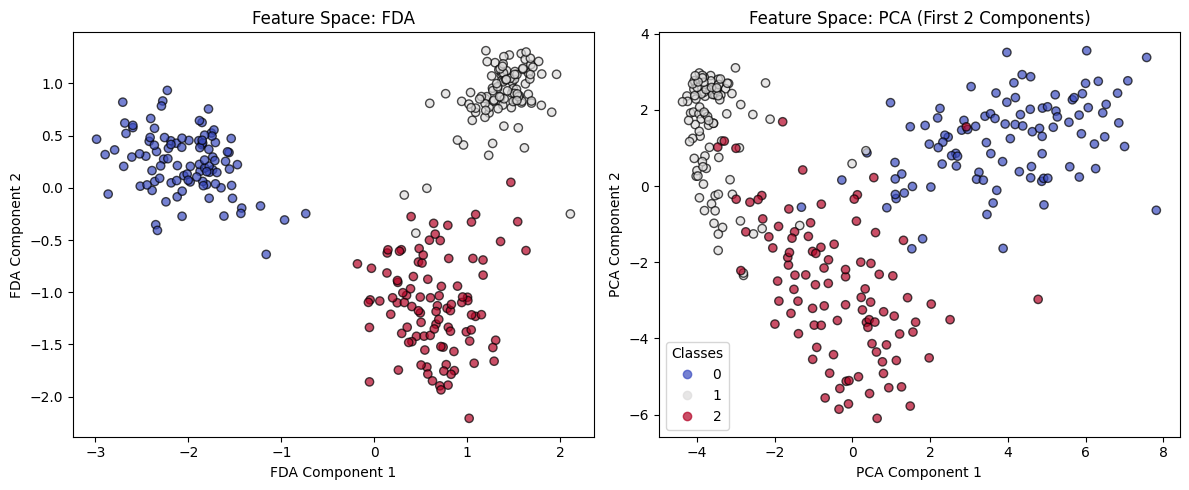

In [35]:
import matplotlib.pyplot as plt

# Step 1: Create a summary report

# Step 2: Visualization of Feature Space (FDA vs PCA)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# FDA-transformed data visualization
scatter1 = axes[0].scatter(X_train_fda[:, 0], X_train_fda[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
axes[0].set_title("Feature Space: FDA")
axes[0].set_xlabel("FDA Component 1")
axes[0].set_ylabel("FDA Component 2")

# PCA (First 2 Components) visualization
scatter2 = axes[1].scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
axes[1].set_title("Feature Space: PCA (First 2 Components)")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")

# Add legend
plt.legend(*scatter1.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()

# Display final report
# print(final_report)
